# Data Challenge : EEG

In [3]:
from tools import *

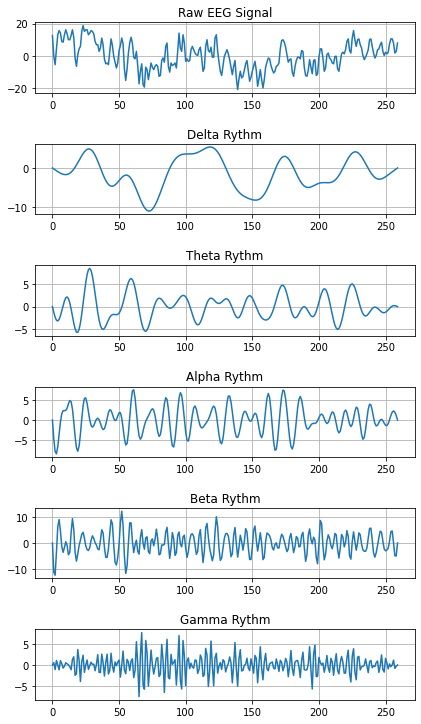

In [4]:
sig = np.load('sig.npy')

info = ['Raw EEG Signal', 'Delta Rythm', 'Theta Rythm', 'Alpha Rythm',
        'Beta Rythm', 'Gamma Rythm']

fig, ax = plt.subplots(6, figsize=(6,10))
fig.tight_layout(h_pad=3)
for i in range(6):
  ax[i].plot(sig[i])
  ax[i].set_title(info[i])
  ax[i].grid()

In [5]:
# upload the datsets
X_train = np.load('X_train.npy')
y_train = np.load('y_train.npy')
print('The dimension of the training set is ', X_train.shape)
print('The dimension of the training labels is ', y_train.shape)

X_test = np.load('X_test.npy')
print('The dimension of the testing set is ', X_test.shape)

The dimension of the training set is  (2136, 64, 3)
The dimension of the training labels is  (2136,)
The dimension of the testing set is  (533, 64, 3)


In [6]:
set(y_train)

{1, 2, 3, 4}

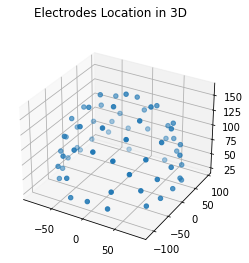

In [7]:
# Display of 3D position of each electrodes
channel_information = np.load('ChanInfo.npy', allow_pickle=True).all()
from mpl_toolkits import mplot3d

import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.axes(projection="3d")

ax.scatter3D(channel_information['position'][:, 0], channel_information['position'][:, 1], channel_information['position'][:, 2])
plt.suptitle("Electrodes Location in 3D")
plt.show()

100%|██████████| 533/533 [00:06<00:00, 79.96it/s]


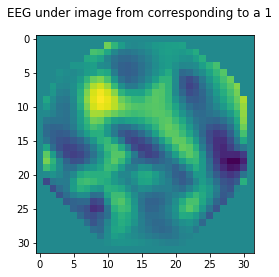

In [141]:
# Image Creation
print('Image Creation')
Electrodes_position = channel_information['position']
X_image_train = band_image(X_train, Electrodes_position, 32)
X_image_test = band_image(X_test, Electrodes_position, 32)

#command specific to keras (need to have n_channels x Height x Width as shape)
#implementation made with pytorch wich is a clearly better lib ;)
X_image_train = X_image_train.swapaxes(1,-1)
X_image_test = X_image_test.swapaxes(1,-1)

plt.imshow(X_image_train[584, :, :, 0])
plt.suptitle('EEG under image from corresponding to a '+str(y_train[584]))
plt.show()

In [200]:
#frame the 3 signals between 0 and 1
mi = X_image_train.min(axis=0)
print(mi.shape)
ma = X_image_train.min(axis=0)
print(ma.shape)
X_image_train_normalized = np.copy(X_image_train)
for i in range(len(X_image_train)):
    X_image_train_normalized[i] = (X_image_train_normalized[i] - mi) / (ma - mi)

(32, 32, 3)
(32, 32, 3)
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


In [206]:
X_image_train_normalized = np.copy(X_image_train)
a = (ma-mi)
a.shape

(32, 32, 3)

In [182]:
#print(m)
#print(s)
for i in range(3):
    print(i+1, np.min(X_image_train_normalized[:,:,:,i]), np.max(X_image_train_normalized[:,:,:,i]))



1 nan nan
2 nan nan
3 nan nan


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


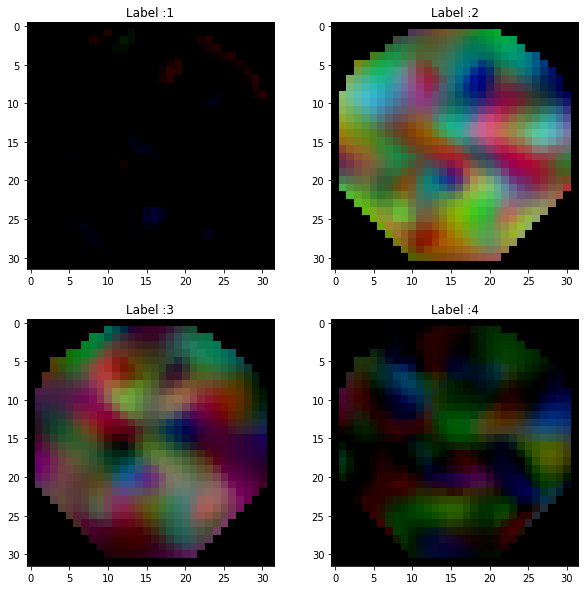

In [138]:
fig, axs = plt.subplots(2, 2, figsize=(10,10))
for i in range(2):
    for j in range(2):
        axs[i, j].imshow(mean_images[2*i+j])
        axs[i, j].set_title('Label :'+str(2*i+j+1))

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a92becc7-288f-4e50-bc09-55f72d9cc7e1' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>